# Project: Category prediction of IKEA furniture

## Data Visualization

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white")


%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

In [2]:
#read the data and delete the index of entry
IKEA_df = pd.read_csv('IKEA_SA_Furniture_Web_Scrapings_sss.csv')
IKEA_df = IKEA_df.drop(IKEA_df.columns[0],axis =1)

In [3]:
IKEA_df.head(2)

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0


In [4]:
m = IKEA_df.shape[0]
n = IKEA_df.shape[1]
print('We have '+str(m)+' sample sand '+str(n-1)+' fearues together with the target catrgory')

We have 3694 sample sand 12 fearues together with the target catrgory


data type of 12 fearues together with target catrgory are shown as follows:

In [5]:
# data type  
IKEA_df.dtypes

item_id                int64
name                  object
category              object
price                float64
old_price             object
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

We can see that some data is missing in feature depth, height and width 

In [6]:
IKEA_df.count()

item_id              3694
name                 3694
category             3694
price                3694
old_price            3694
sellable_online      3694
link                 3694
other_colors         3694
short_description    3694
designer             3694
depth                2231
height               2706
width                3105
dtype: int64

## Target and features
Now we start to examine the properties of data for each features, which help us better understand the dataset and get ideas of how to clean the dataset.

### item_id

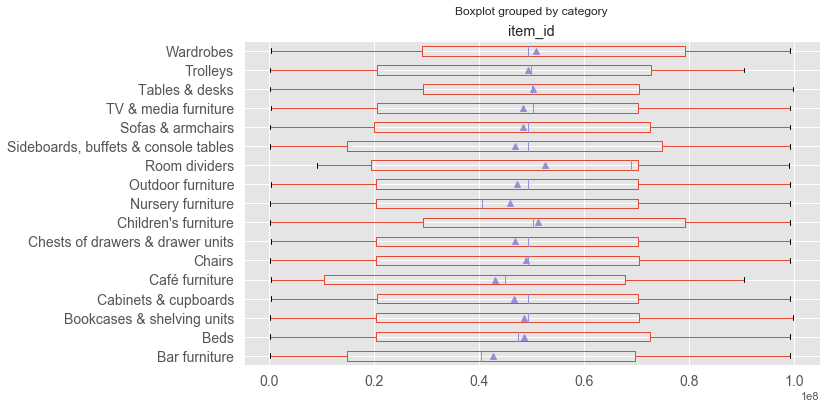

In [7]:
ax0 = IKEA_df.boxplot(column='item_id',by='category',vert=False, figsize=(10,6), fontsize =14,showmeans =True)
ax0.set_xlabel('')
ax0.figure.savefig('item_id boxplot.jpg',bbox_inches = 'tight')

The item_id is the number consist of 5 to 8 digit numbers.From the boxplot above we can see, more or less, 50%  items of most categories taking value from 2e^7 to 7e^7, which means that item_id might not give strong evidence of category.   

### name

In [8]:
nun =  IKEA_df['name'].nunique()
#print(IKEA_df['category'].unique())
print('There are ' + str(nun) + ' unique name in total' )

There are 607 unique name in total


### category

In [9]:
nun =  IKEA_df['category'].nunique()
#print(IKEA_df['category'].unique())
print('There are ' + str(nun) + ' categories in total' )

There are 17 categories in total


In [10]:
type_df = IKEA_df.groupby('category')['item_id'].count().reset_index(name='count').sort_values(['count'], ascending=False) 


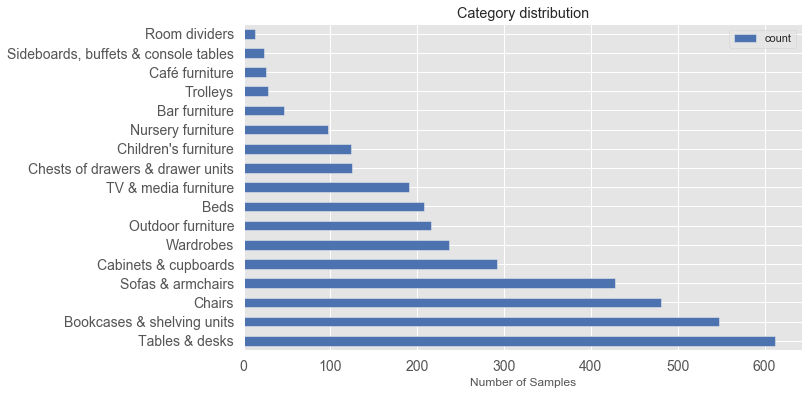

In [11]:
ax1 = type_df.set_index('category').plot.barh(rot=0, title='Category distribution',color = 'b',figsize=(10,6), fontsize=14)
ax1.set_xlabel("Number of Samples")
ax1.set_ylabel('')
ax1.figure.savefig('category distribution.jpg',bbox_inches = 'tight')


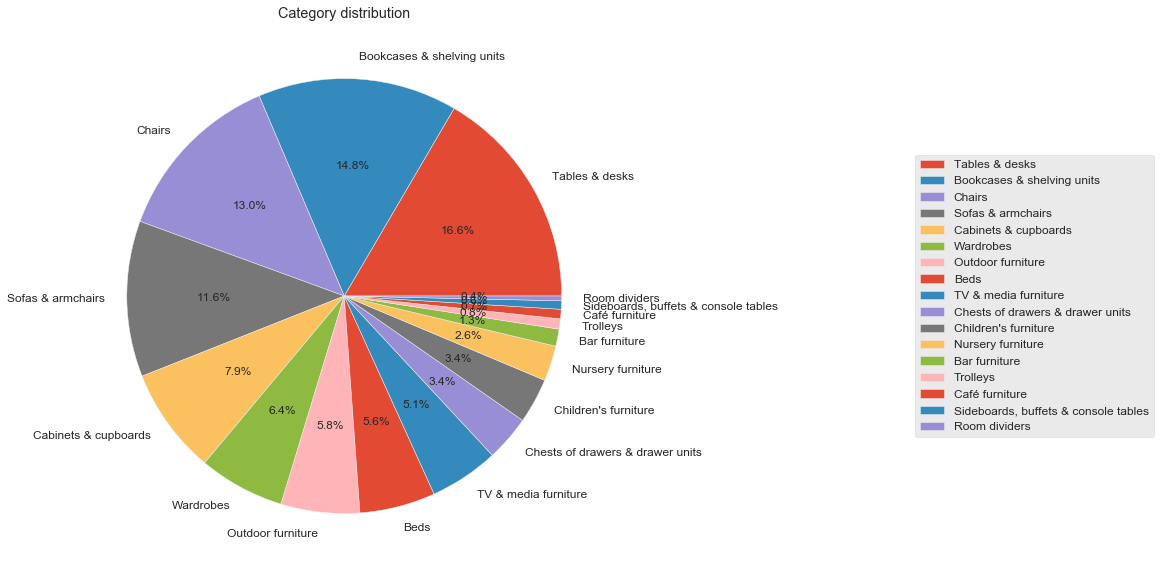

In [12]:
ax = type_df.set_index('category').plot.pie(title='Category distribution', y='count',figsize=(10,10), autopct='%1.1f%%',fontsize=12)
ax.set_ylabel('')
ax.legend(bbox_to_anchor=(2,0.5), loc="right", fontsize=12)
ax.figure.savefig('category plotpie.jpg',bbox_inches = 'tight')

From the graph we can observe that more than 16% data samples are from category Tables& desks, followed by Bookcase & sheiving units with about 15% and Chairs of 13%. On the other hand, samples of category Room dividers, Sideboards, buffets & console tables, Cafe furniture and Trolleys acount for less than 1% respectly. We have a quite inbalanced classification task. 

### price

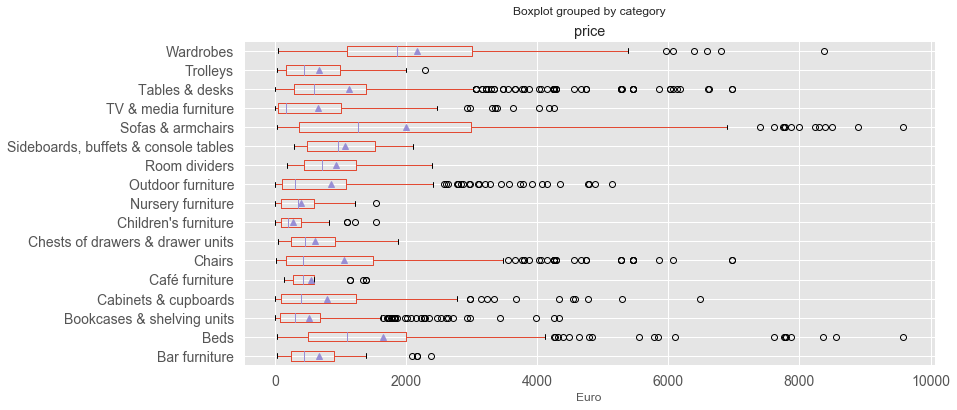

In [13]:
ax2 = IKEA_df.boxplot(column='price',by='category',vert=False, figsize=(12,6), fontsize =14,showmeans =True)
ax2.set_xlabel('Euro')
ax2.figure.savefig('price boxplot.jpg',bbox_inches = 'tight')

As shown above in the boxplot of price, furniture of category Wardrobes are the most expensive, while the children's furnitures are the cheapest. Sofa & armchairshas has the most wide range of price from about 250€ to 70.000€ and the ourlier can be 90.000€, while Cafe furniture has the most stable price. Price area (Interquartile Range of price) of some categories do overlap, but gernerally it is fair to say price can be a useful feature to determine the category.

### old_price

In [14]:
t = IKEA_df[IKEA_df['old_price'].str.contains('No old price')]['item_id'].count() /m
print( str( round(t,4)*100) + '% of feature old_price is no old price' )

82.3% of feature old_price is no old price


and it is also impossible to recover those data. Feature old_price might not help to determine the category and can be ignored for training. 

### sellable_online

In [15]:
t = IKEA_df[IKEA_df['sellable_online'] == True]['item_id'].count()/m
print( str( round(t,4)*100) + '% of feature sellable_online is True' )


99.24% of feature sellable_online is True


, indicating that this feature cannot help to determin the category and might be deleted for training.

### other_colors

In [43]:
t = IKEA_df[IKEA_df['other_colors'].str.contains('Yes')]['item_id'].count()/m
print( str( round(t,4)*100) + '% of feature other_colors is Yes' )


40.93% of feature other_colors is Yes


### designer

In [17]:
nun_designer =  IKEA_df['designer'].nunique()
#print(IKEA_df['designer'].unique())
print('There are ' + str(nun_designer) + ' different designers in total' )

There are 381 different designers in total


In [18]:
designer_df = IKEA_df.groupby('designer')['item_id'].count().reset_index(name='count').sort_values(['count'], ascending=False)
designer_df['count%'] = round(designer_df['count'] *100/m ,2) 

In [19]:
designer_df.head(5)

,designer,count,count%
192,IKEA of Sweden,828,22.41
138,Ehlén Johansson,161,4.36
163,Francis Cayouette,151,4.09
344,Ola Wihlborg,134,3.63
279,K Hagberg/M Hagberg,122,3.30


In [20]:
t = designer_df[designer_df['count']< 2].shape[0]
print(str(t)+ ' of ' + str(nun_designer)+'designers design just 1 items in dataset')

139 of 381designers design just 1 items in dataset


In [21]:
t = designer_df[designer_df['count']< 5].shape[0]
print(str(t)+ ' of ' + str(nun_designer)+' designers design less than 5 items in dataset')

278 of 381 designers design less than 5 items in dataset


In [22]:
t  = designer_df[designer_df['count']< 10].shape[0]
print(str(t)+ ' of ' + str(nun_designer)+' designers design less than 10 items in dataset')

320 of 381 designers design less than 10 items in dataset


We find that some entries in desinger is actually long description of the furniture. We may replace them with "designer unknowm", but  this might also mislead the algorithm that those furniture were designed by the same person. Moreover we observe furniture of same category might have same text of long description for feature **designer**. Considering those mistakes acount for 7% of the whole dataset, we can also just keep the origin ones.

In [23]:
IKEA_df['designer_len'] = IKEA_df['designer'].str.len() 
IKEA_df['designer_len'].describe()

count    3694.000000
mean       33.755820
std        86.016629
min         3.000000
25%        14.000000
50%        15.000000
75%        28.000000
max      1261.000000
Name: designer_len, dtype: float64

In [24]:
t = IKEA_df[IKEA_df['designer_len'] > 40].shape[0] 
print(str( round(t*100/m,2)) +'% samples have actually text of long description in feature designer' )

7.26% samples have actually text of long description in feature designer


In [25]:
IKEA_df[IKEA_df['designer_len'] > 40].head(2)

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,designer_len
51,50468953,VATTVIKEN,Beds,995.0,No old price,True,https://www.ikea.com/sa/en/p/vattviken-armchai...,No,Armchair-bed,504.689.53 Small and easy-to-place chair-bed w...,83.0,86.0,92.0,403
77,90331091,RIDABU,Beds,100.0,SR 125,True,https://www.ikea.com/sa/en/p/ridabu-mirror-doo...,No,"Mirror door, 40x120 cm",903.310.91 The door can be hung with the openi...,NaN,120.0,40.0,199


We now examine favor of furniture category of TOP3 designers 

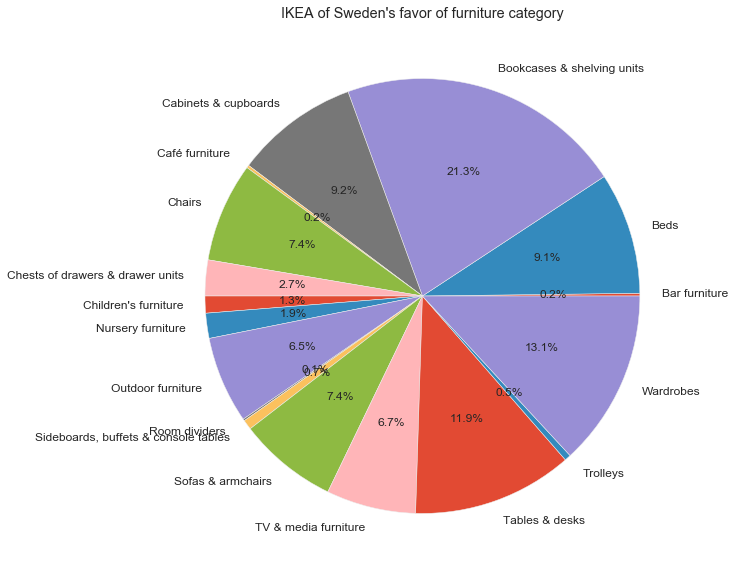

In [26]:
df1 = IKEA_df[IKEA_df['designer'].str.contains('IKEA of Sweden')].groupby('category')['item_id'].count() \
                                    .reset_index(name = 'count')
axd1 = df1.set_index('category').plot.pie(title='IKEA of Sweden\'s favor of furniture category', y='count',figsize=(10,10), \
                                          autopct='%1.1f%%', fontsize=12, legend = None)
axd1.set_ylabel('')
#axd1.legend(bbox_to_anchor=(1.5,0.5), loc="right", fontsize=12)
axd1.figure.savefig('TOP1 designer.jpg',bbox_inches = 'tight')

IEA of Sweden covers all 17  furniture catogeries and favor the Bookcases & shelving units.

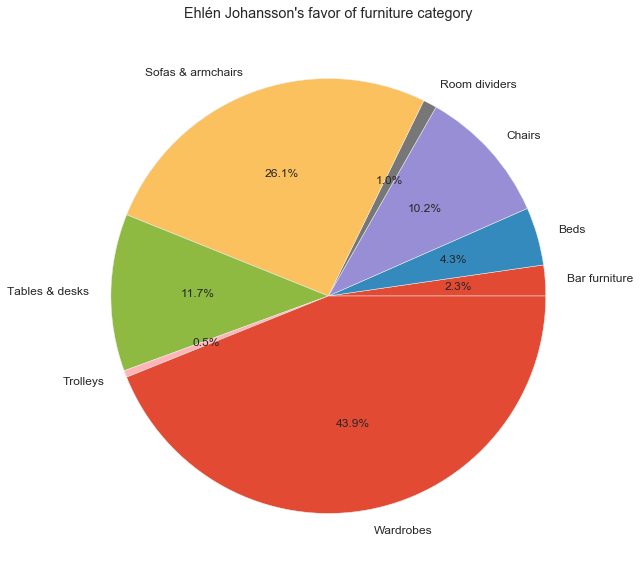

In [27]:
df2 = IKEA_df[IKEA_df['designer'].str.contains('Ehlén Johansson')].groupby('category')['item_id'].count() \
                                    .reset_index(name = 'count')
axd2 = df2.set_index('category').plot.pie(title='Ehlén Johansson\'s favor of furniture category', y='count',figsize=(10,10), \
                                          autopct='%1.1f%%', fontsize=12, legend = None)
axd2.set_ylabel('')
#axd2.legend(bbox_to_anchor=(1.5,0.5), loc="right", fontsize=12)
axd2.figure.savefig('TOP2 designer.jpg',bbox_inches = 'tight')

In [28]:
t1 = IKEA_df[IKEA_df['category'].str.contains('Wardrobes')]['item_id'].count() 
t2 = IKEA_df[IKEA_df['category'].str.contains('Wardrobes') & IKEA_df['designer'].str.contains('Ehlén Johansson')]['item_id'].count() 
print(round(t2/t1, 4))

0.7331


Designer Ehlén Johanssonfavors Wardrobes and on the other hand, indeed about 73% items of category Wardrobes are designered by Ehlén Johansson, including the case IKEA of Sweden/Ehlén Johansson and Ehlén Johansson/IKEA of Sweden).

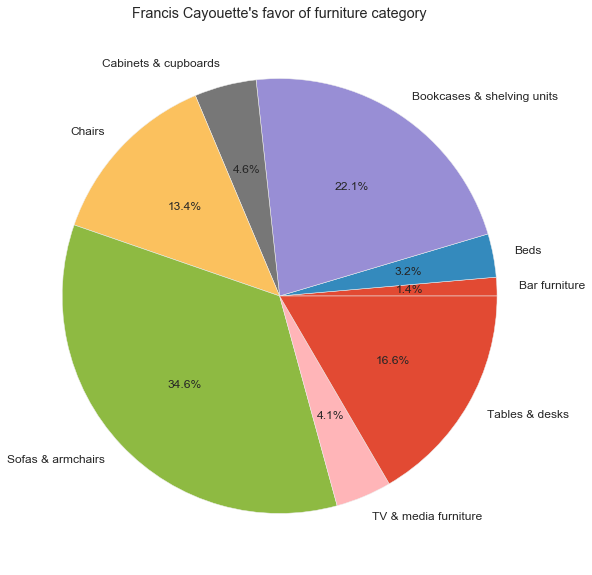

In [29]:
df3 = IKEA_df[IKEA_df['designer'].str.contains('Francis Cayouette')].groupby('category')['item_id'].count() \
                                    .reset_index(name = 'count')
axd3 = df3.set_index('category').plot.pie(title='Francis Cayouette\'s favor of furniture category', y='count',figsize=(10,10),\
                                          autopct='%1.1f%%', fontsize=12, legend = None)
axd3.set_ylabel('')
#axd3.legend(bbox_to_anchor=(1.5,0.5), loc="right", fontsize=12)
axd3.figure.savefig('TOP3 designer.jpg',bbox_inches = 'tight')

In [30]:
t1 = IKEA_df[IKEA_df['category'].str.contains('Sofas & armchairs')]['item_id'].count() 
t2 = IKEA_df[IKEA_df['category'].str.contains('Sofas & armchairs') & IKEA_df['designer'].str.contains('Francis Cayouette')]['item_id'].count() 
print(round(t2/t1, 4))

0.1752


Designer Francis Cayouette favors Wardrobes and on the other hand, while around 17% items of category Sofas & armchairs are designered by Francis Cayouette.

### depth,height,width

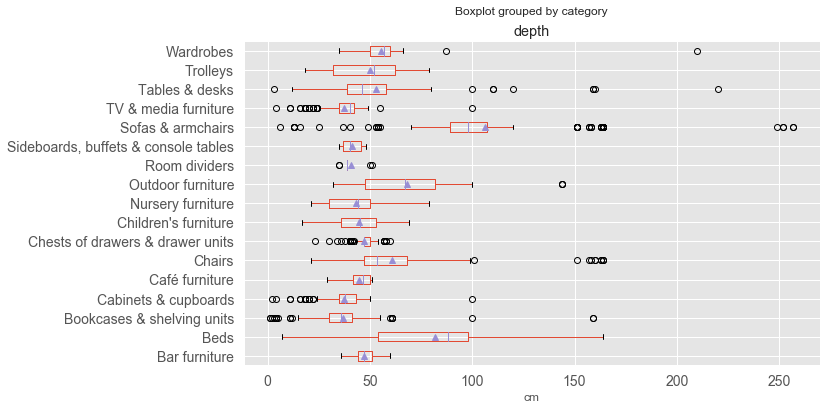

In [31]:
ax3 = IKEA_df.boxplot(column='depth',by='category',vert=False, figsize=(10,6), fontsize =14,showmeans =True)
ax3.set_xlabel('cm')
ax3.figure.savefig('depth boxplot.jpg',bbox_inches = 'tight')

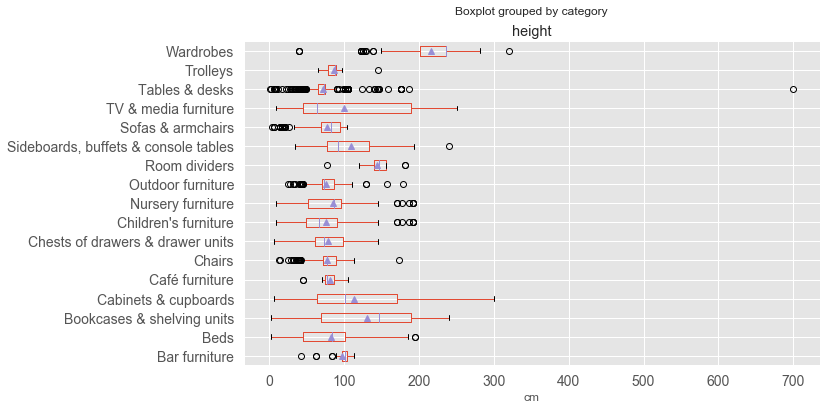

In [32]:
ax4 = IKEA_df.boxplot(column='height',by='category',vert=False, figsize=(10,6), fontsize =14,showmeans =True)
ax4.set_xlabel('cm')
ax4.figure.savefig('height boxplot.jpg',bbox_inches = 'tight')


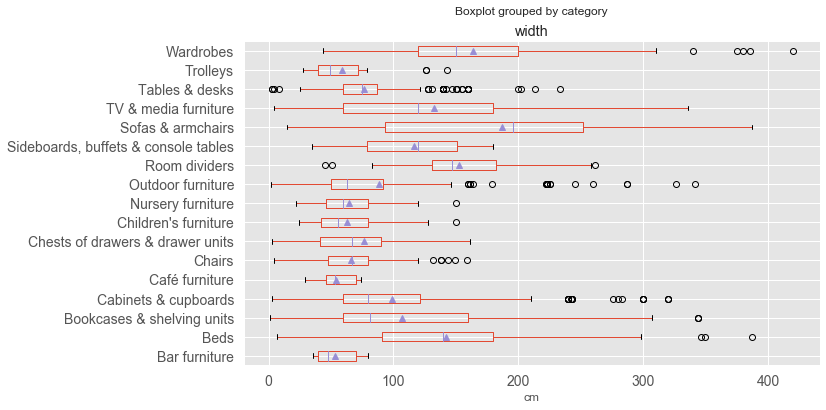

In [33]:
ax5 = IKEA_df.boxplot(column='width',by='category',vert=False, figsize=(10,6), fontsize =14,showmeans =True)
ax5.set_xlabel('cm')
ax5.figure.savefig('width boxplot.jpg',bbox_inches = 'tight')


Generally speaking, the feature of size vary a lot for different category, especially for feature **depth**. Hence feature of size might play an important role in prediction of category. 

### link, short_description
Feature link and short_desctiption are just what they are literally, which are different for each items and uncorrelated to the category.We will just ignore them for training. To be noticed, short description contains size data,  which are not scrapped correctly as feature **depth,height,width**. We can make use of this to recover the NaN in **depth,height,width**, however, most of the cases are technically too compilicated. Furthermore, both feature **link** and **short_description** contains the key words, which indicate directly its category. It might be king of cheating to make use ot them, while it is also extremely technically complicated.

## Correlation
We would like to check the colinerity of numerical (including boolean) features. We can encode the nominal features to integer through factorization, this might cause some misleadings, but at this point we just want to have a idea of correlation between features. In the case for training the algorithms that not understand nominal features, we might use the one-hot encoding to avoid misunderstanding caused by value of nubers. However, this leads to quite high computational cost. For example, for 370 different designers, one-hot encoding create 9 more features, respectyly taking value 0/1 to present the feature designer.

In [3]:
corr_df = IKEA_df.copy()

In [4]:
corr_df['category'] = pd.factorize(corr_df['category'])[0] + 1
corr_df['name'] = pd.factorize(corr_df['name'])[0] + 1
corr_df['sellable_online'] = pd.factorize(corr_df['sellable_online'])[0] + 1
corr_df['other_colors'] = pd.factorize(corr_df['other_colors'])[0] + 1
corr_df['designer'] = pd.factorize(corr_df['designer'])[0] + 1

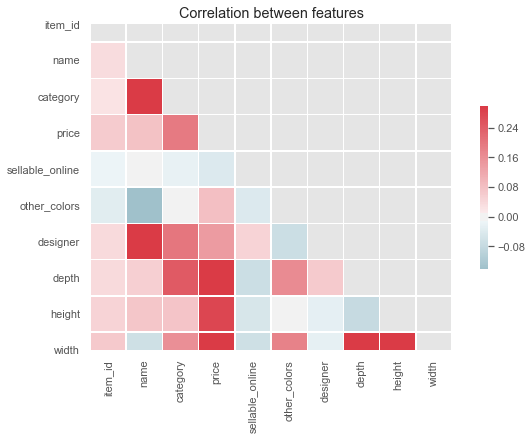

In [5]:
# correlation / scatter matrix here
corr = corr_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation between features')
ax.figure.savefig('corr.jpg',bbox_inches = 'tight')

As the analysis of individual features above, **depth** and **price** play the relative more important role indetermination of **category**, while **sellable_online** and **other_colors** is less correlated to **category**. 
Price of items is relative highly correlated with depth of items and the name of items is relativehighly correlated with designers, those case indicating the colinearly of the features, which might result in bad prediciton in certain algorithms.Anyway, the correlation between features (including target category) are not at a high level (all < 0.3).

## Data Cleaning

In [7]:
#convert object to boolean
IKEA_df['other_colors'] = IKEA_df['other_colors'].map({'Yes': True, 'No': False})

With following observations, we can conclude that all NaN in dataset concerning the data size

In [8]:
IKEA_df[IKEA_df.isnull().any(axis=1)].shape

(1795, 13)

In [9]:
size = ['depth','height','width']
IKEA_df[IKEA_df[size].isnull().any(axis=1)].shape

(1795, 13)

In [10]:
IKEA_df[IKEA_df[IKEA_df.columns[~IKEA_df.columns.isin(size)]].isnull().any(axis=1)].shape

(0, 13)

In [11]:
IKEA_df[IKEA_df[size].isnull().all(axis=1)].head(4)

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,False,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,False,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN
28,29297227,STENSELE / NORRARYD,Bar furniture,1340.0,No old price,True,https://www.ikea.com/sa/en/p/stensele-norraryd...,False,Bar table and 2 bar stools,Nike Karlsson/Maja Ganszyniec,NaN,NaN,NaN
32,19297275,NORRÅKER / NORRÅKER,Bar furniture,1266.0,"SR 1,385",True,https://www.ikea.com/sa/en/p/norraker-norraker...,False,"Bar table and 2 bar stools, 7...",J Karlsson/N Karlsson,NaN,NaN,NaN


### NaN in size data

According to our observation to the datasAccording to our observation to the dataset, compared with the product size shown in the website, we have the following conclusions. There are several main reasons why size data is missing \.
 First apparently some data are not successfully scraped from the website and neither be recorded in the short description, it is impossible to recover those. \
Second, some items are a set of different furniture, so there is no product size. \
Third, some items have variable size, for example, its width can be 190 to 220 cm. Although those data are recorded in short description, its hard to extract the exact size for all those items. The biggest problem is that we can’t tell to which of three, depth, height and width , the number belongs, since the it is often that data is incomplete in short description.\
The last, there are some small items which measured in mm instead of cm and instead of height, the diameter is measured and recorded in short description.


In [12]:
#split description and size data in feature short description
IKEA_df['size']= IKEA_df['short_description'].str.rsplit(',', n=1).str[1]
IKEA_df['short_description']= IKEA_df['short_description'].str.rsplit(',', n=1).str[0]

In [13]:
#split numbers and unit
IKEA_df['unit'] = IKEA_df['size'].str.replace('\d+|-|x', ' ')
IKEA_df['size_nounit'] = IKEA_df['size'].str.replace('cm|mm', '')

Following result shows as we find that indeed all small items don’t have height and considering it is convenient to extract the single numbers in short description representing the diameter, we fill the NaN in height of small items with data recorded in short description. Furthermore, we find that size data of small items, of which the diameter is measured with mm, is actually in mm according to the link, therefore we correct those.  

In [14]:
IKEA_df[IKEA_df['unit'].str.contains('mm') & IKEA_df[size].isnull().any(axis=1)].shape

(132, 16)

In [15]:
IKEA_df[IKEA_df['unit'].str.contains('mm') & IKEA_df['height'].isnull()].shape

(132, 16)

In [16]:
IKEA_df['height'] = np.where(IKEA_df['unit'].str.contains('mm') , IKEA_df.size_nounit, IKEA_df.height)
IKEA_df['height'] = np.where(IKEA_df['unit'].str.contains('mm'), IKEA_df.height.astype(float)/10, IKEA_df.height)
IKEA_df['height'] = IKEA_df['height'].astype(float)

In [17]:
IKEA_df['depth'] = np.where(IKEA_df['unit'].str.contains('mm'), IKEA_df.depth.astype(float)/10, IKEA_df.depth)
IKEA_df['width'] = np.where(IKEA_df['unit'].str.contains('mm'), IKEA_df.width.astype(float)/10, IKEA_df.depth)

For simplicity, we fill the NaN in size data either with mean or median, depending on the category and wether there are many outliers in size data according to the boxplot for each dimension.

In [18]:
#calculate median/mean of items of each furniture category 
dm =IKEA_df.groupby('category')['depth'].median().reset_index(name = 'depth_median')
dd = IKEA_df.groupby('category')['depth'].mean().reset_index(name = 'depth_mean')
hm = IKEA_df.groupby('category')['height'].mean().reset_index(name = 'height_mean')
wm= IKEA_df.groupby('category')['width'].median().reset_index(name = 'width_median')
wd =IKEA_df.groupby('category')['width'].mean().reset_index(name = 'width_mean')

In [19]:
IKEA_df = IKEA_df.join(dm.set_index('category'), on='category')
IKEA_df = IKEA_df.join(dd.set_index('category'), on='category')
IKEA_df = IKEA_df.join(hm.set_index('category'), on='category')
IKEA_df = IKEA_df.join(wm.set_index('category'), on='category')
IKEA_df = IKEA_df.join(wd.set_index('category'), on='category')

In [20]:
IKEA_df['depth'] = np.where(IKEA_df['depth'].isnull(), IKEA_df.depth_mean, IKEA_df.depth)
IKEA_df['height'] = np.where(IKEA_df['height'].isnull(), IKEA_df.height_mean, IKEA_df.height)
IKEA_df['width'] = np.where(IKEA_df['width'].isnull(), IKEA_df.width_mean, IKEA_df.width)

## Prediction with Tree-based algorithm 

In [21]:
learn = ['item_id','name','category','price','sellable_online','other_colors','designer','depth','height','width' ]
learn_df = IKEA_df [learn]

In [22]:
learn_df[learn_df.isna().any(axis =1)]['item_id'].count()

0

Now the data frame are cleanen and modifiey to be suitable for treaa-based algorithms

### Random Forest

### Boosting